# Importing Necessary Modules

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas import Series,DataFrame
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [133]:
pip install plotly 

# Functions used later in the program

In [134]:
def dis_scatter(x,y):
    fig = px.scatter_matrix(x,dimensions=y,color=x["Rating_Labels"])
    fig.update_traces(diagonal_visible=False)
    fig.show()

# Reading The file and describing the Data

In [135]:
data=pd.read_csv("epi_r.csv")

In [136]:
data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.005536,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,...,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.005585,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.074197,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,...,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.074529,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071142,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

# Finding Duplicates and Removing them

In [137]:
no_of_duplicates=data.duplicated().sum()
print("Number of dupliacte records in the dataset are {}".format(no_of_duplicates))
data.drop_duplicates(inplace=True)
no_of_duplicates=data.duplicated().sum()
print("Number of duplicate records in the dataset after removing duplicates are {}".format(no_of_duplicates))

Number of dupliacte records in the dataset are 1801
Number of duplicate records in the dataset after removing duplicates are 0


In [138]:
data.shape

(18251, 680)

# Dropping Unwanted Columns and seperating columns

In [139]:
data=data.drop("title",axis=1)

In [140]:
unique_count=DataFrame(data.nunique())
unique_count

,0
rating,8
calories,1858
protein,282
fat,326
sodium,2434
...,...
cookbooks,2
leftovers,2
snack,2
snack week,2


In [141]:
cols=list(data.columns)
continuos_columns=unique_count[unique_count[0]>2]
categorical_columns=unique_count[unique_count[0]==2]
continuos_columns=list(continuos_columns.to_dict()[0].keys())
categorical_columns=list(categorical_columns.to_dict()[0].keys())

In [142]:
categorical_columns=list(Series(categorical_columns).unique())

# Adding Necessary Columns

In [143]:
ratings=list(data['rating'])
rating_labels=list()
for i in ratings:
    if(0<=i<=1):
        rating_labels.append("Very Bad")
    elif(1<i<=2):
        rating_labels.append("Bad")
    elif(2<i<=3):
        rating_labels.append("Average")
    elif(3<i<=4):
        rating_labels.append("Good")
    elif(4<i<=5):
        rating_labels.append("Excellent")
print(len(rating_labels))
data["Rating_Labels"]=list(Series(rating_labels))
cols.append("Rating_Labels")
categorical_columns.append("Rating_Labels")

18251


In [144]:
data.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Rating_Labels
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Average
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
3,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good


# Finding And Replacing Null Values

In [145]:
nullvals={}
greater_than_zero_null={} #placing Those columns having greater than 0 Null vals into a seperate dictionary
for i in range(len(cols)):
    temp=(data[cols[i]].isnull().sum())
    nullvals[cols[i]]=temp
    if(temp>0):
        greater_than_zero_null[cols[i]]=temp


In [146]:
greater_than_zero_null

{'calories': 3749, 'fat': 3801, 'protein': 3781, 'sodium': 3750}

Text(0.5, 1.0, 'Missing Values')

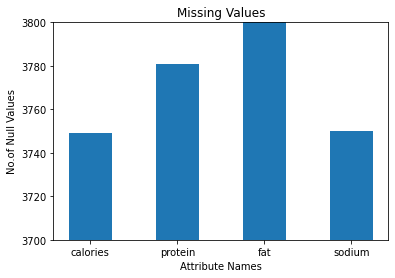

In [147]:
k1=list(greater_than_zero_null.keys())
v1=list(greater_than_zero_null.values())
plt.bar(k1,v1,width=0.5)
plt.ylim(min(v1).round(-2),max(v1).round(-2))
plt.xlabel("Attribute Names")
plt.ylabel("No.of Null Values")
plt.title("Missing Values")

# Filling Null values in Continuous Data

In [148]:
data=data.interpolate()

In [149]:
for i in range(len(cols)):
    temp=(data[cols[i]].isnull().sum())
    print("Column name is {} and number or null values are {}".format(cols[i],temp))
   

Column name is rating and number or null values are 0
Column name is calories and number or null values are 0
Column name is protein and number or null values are 0
Column name is fat and number or null values are 0
Column name is sodium and number or null values are 0
Column name is #cakeweek and number or null values are 0
Column name is #wasteless and number or null values are 0
Column name is 22-minute meals and number or null values are 0
Column name is 3-ingredient recipes and number or null values are 0
Column name is 30 days of groceries and number or null values are 0
Column name is advance prep required and number or null values are 0
Column name is alabama and number or null values are 0
Column name is alaska and number or null values are 0
Column name is alcoholic and number or null values are 0
Column name is almond and number or null values are 0
Column name is amaretto and number or null values are 0
Column name is anchovy and number or null values are 0
Column name is a

In [150]:
data

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Rating_Labels
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Average
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
3,5.000,356.0,13.0,19.5,308.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Excellent
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0

# Removing Outliers in each column

In [151]:
data

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Rating_Labels
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Average
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
3,5.000,356.0,13.0,19.5,308.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Excellent
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0

In [152]:
temp_dict={}
data_after_out=data
con_cols=continuos_columns[1:]
for i in con_cols:
    q1=data_after_out[i].describe()['25%']
    q3=data_after_out[i].describe()['75%']
    iqr=q3-q1
    temp_dict[i]=[q1,q3,iqr]


In [153]:
for i in list(temp_dict.keys()):
    q1=temp_dict[i][0]
    q3=temp_dict[i][1]
    iqr=temp_dict[i][2]
    data_after_out=data_after_out[(q1-1.5*iqr)<=data_after_out[i]]
    data_after_out=data_after_out[data_after_out[i]<=q3+1.5*iqr]
    print("Length after each outlier is removed from columns is",len(data_after_out))

Length after each outlier is removed from columns is 17102
Length after each outlier is removed from columns is 16588
Length after each outlier is removed from columns is 16333
Length after each outlier is removed from columns is 15689


In [154]:
print("Number of outliers is {} ".format(len(data)-len(data_after_out)))

Number of outliers is 2562 


# Data after Removing outliers

In [155]:
data_after_out

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,Rating_Labels
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Average
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
3,5.000,356.0,13.0,19.5,308.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20044,3.750,84.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Excellent
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0

In [156]:
data_after_out.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,...,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.0,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000,15689.000000
mean,3.690723,363.851338,13.542774,19.547628,381.401633,0.000255,0.000064,0.000637,0.001466,0.000255,0.005099,0.000191,0.000127,0.049908,0.032316,0.002295,0.002422,0.005737,0.005354,0.000127,0.000637,0.076295,0.034610,0.000319,0.013959,0.000446,0.007776,0.014787,0.000956,0.011154,0.000064,0.000382,0.000319,0.014405,0.011091,0.044554,0.028236,0.232902,0.010198,0.002741,...,0.094907,0.108484,0.367965,0.000319,0.000319,0.000701,0.030021,0.000637,0.007521,0.000064,0.023583,0.001211,0.001466,0.000382,0.007521,0.004462,0.005928,0.001976,0.000064,0.000064,0.253362,0.003059,0.021990,0.001785,0.000892,0.0,0.009178,0.150488,0.000255,0.005227,0.001530,0.028173,0.000064,0.000319,0.016253,0.000127,0.000382,0.001657,0.001084,0.015998
std,1.349990,217.076482,14.043926,15.352425,374.651559,0.015966,0.007984,0.025239,0.038261,0.015966,0.071228,0.013827,0.011290,0.217761,0.176843,0.047849,0.049157,0.075525,0.072978,0.011290,0.025239,0.265479,0.182796,0.017850,0.117324,0.021119,0.087842,0.120705,0.030907,0.105027,0.007984,0.019553,0.017850,0.119157,0.104730,0.206328,0.165653,0.422694,0.100473,0.052282,...,0.293096,0.311000,0.482267,0.017850,0.017850,0.026470,0.170651,0.025239,0.086401,0.007984,0.151752,0.034780,0.038261,0.019553,0.086401,0.066649,0.076766,0.044409,0.007984,0.007984,0.434950,0.055230,0.146655,0.042209,0.029860,0.0,0.095366,0.357560,0.015966,0.072108,0.039083,0.165471,0.007984,0.017850,0.126453,0.011290,0.019553,0.040676,0.032901,0.125473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2

In [157]:
dis_scatter(data_after_out,con_cols)

# Finding Correlation between Cotinuous Variables

In [158]:
correlations=data_after_out[con_cols].corr()

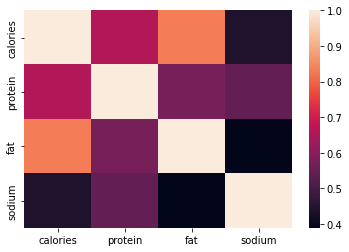

In [159]:
sns.heatmap(correlations)

In [160]:
correlations

,calories,protein,fat,sodium
calories,1.000000,0.656935,0.835042,0.437157
protein,0.656935,1.000000,0.573694,0.545664
fat,0.835042,0.573694,1.000000,0.389348
sodium,0.437157,0.545664,0.389348,1.000000


# Standarizing values

In [161]:
x=data_after_out[con_cols]
x=DataFrame(StandardScaler().fit_transform(x),columns=con_cols)
x["Rating_Labels"]=Series(list(data_after_out["Rating_Labels"]))
x.describe()

,calories,protein,fat,sodium
count,1.568900e+04,1.568900e+04,1.568900e+04,1.568900e+04
mean,-1.066703e-16,-1.900449e-16,-6.531202e-17,2.592525e-16
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-1.676197e+00,-9.643462e-01,-1.273301e+00,-1.018049e+00
25%,-7.456197e-01,-7.507239e-01,-7.521936e-01,-7.938339e-01
50%,-2.227458e-01,-3.946867e-01,-2.310867e-01,-3.240491e-01
75%,6.110883e-01,4.598025e-01,5.505737e-01,5.154243e-01
max,3.704567e+00,3.592929e+00,3.373236e+00,3.471599e+00


In [162]:
dis_scatter(x,con_cols)

# Principal Component Analysis

In [163]:
pca=PCA(n_components=3)

In [164]:
principalComponents = pca.fit_transform(x[list(x.columns)[:-1]])

In [165]:
x1=DataFrame(principalComponents,columns=['PCA_1','PCA_2','PCA_3'])
x1.describe()

,PCA_1,PCA_2,PCA_3
count,1.568900e+04,1.568900e+04,1.568900e+04
mean,-2.259366e-16,-3.955554e-17,7.713322e-18
std,1.655351e+00,8.477410e-01,6.207005e-01
min,-2.491225e+00,-3.157244e+00,-3.200147e+00
25%,-1.297447e+00,-4.604791e-01,-3.318955e-01
50%,-3.649234e-01,-6.780452e-02,5.023495e-03
75%,1.053346e+00,3.850702e-01,2.394431e-01
max,6.527081e+00,3.775894e+00,3.874414e+00


In [166]:
list_sum_of_cat=[]
for i in range(len(x)):
    temp=data_after_out[categorical_columns[:-1]].iloc[i].sum()
    list_sum_of_cat.append(temp)

In [167]:
x1["Combination_of_Categorical"]=list_sum_of_cat

In [168]:
x1["Rating_Labels"]=Series(list(x["Rating_Labels"]))

In [169]:
dis_scatter(x1,['PCA_1','PCA_2','PCA_3'])

In [170]:
x1

,PCA_1,PCA_2,PCA_3,Combination_of_Categorical,Rating_Labels
0,0.520938,0.869622,0.999955,11.0,Average
1,1.544166,2.149168,-1.071377,11.0,Excellent
2,-1.438811,0.126362,0.189947,7.0,Good
3,-0.121454,-0.148576,0.058633,17.0,Excellent
4,1.195903,-0.423513,-0.072681,11.0,Good
...,...,...,...,...,...
15684,-2.274326,0.040190,0.220285,9.0,Good
15685,-2.209771,0.225393,0.255598,8.0,Good
15686,1.588795,-0.201107,-0.088135,16.0,Excellent
15687,2.058850,-0.049200,0.201169,15.0,Excellent


In [171]:
x1["Combination_of_Categorical"].isnull().sum()

0

In [172]:
x1["rating"]=list(Series(data_after_out["rating"]))

In [173]:
x1

,PCA_1,PCA_2,PCA_3,Combination_of_Categorical,Rating_Labels,rating
0,0.520938,0.869622,0.999955,11.0,Average,2.500
1,1.544166,2.149168,-1.071377,11.0,Excellent,4.375
2,-1.438811,0.126362,0.189947,7.0,Good,3.750
3,-0.121454,-0.148576,0.058633,17.0,Excellent,5.000
4,1.195903,-0.423513,-0.072681,11.0,Good,3.125
...,...,...,...,...,...,...
15684,-2.274326,0.040190,0.220285,9.0,Good,3.750
15685,-2.209771,0.225393,0.255598,8.0,Good,3.125
15686,1.588795,-0.201107,-0.088135,16.0,Excellent,4.375
15687,2.058850,-0.049200,0.201169,15.0,Excellent,4.375


# Insight based on Vizualization Techniques

In [174]:
grouped_data=x1.groupby("Rating_Labels").count()

In [175]:
height=list(grouped_data["PCA_1"])
temp_dict2=DataFrame(grouped_data["rating"]).to_dict()
labels=list(temp_dict2['rating'].keys())
values=list(temp_dict2['rating'].values())
print(labels,values)

['Average', 'Bad', 'Excellent', 'Good', 'Very Bad'] [432, 224, 8260, 5294, 1479]


In [176]:
px.bar(x=labels,y=values,color=labels)




In [177]:
px.histogram(x=x1["PCA_1"])

In [178]:
px.histogram(x=x1["PCA_2"])

In [179]:
px.histogram(x=x1["PCA_3"])

In [180]:
x1

,PCA_1,PCA_2,PCA_3,Combination_of_Categorical,Rating_Labels,rating
0,0.520938,0.869622,0.999955,11.0,Average,2.500
1,1.544166,2.149168,-1.071377,11.0,Excellent,4.375
2,-1.438811,0.126362,0.189947,7.0,Good,3.750
3,-0.121454,-0.148576,0.058633,17.0,Excellent,5.000
4,1.195903,-0.423513,-0.072681,11.0,Good,3.125
...,...,...,...,...,...,...
15684,-2.274326,0.040190,0.220285,9.0,Good,3.750
15685,-2.209771,0.225393,0.255598,8.0,Good,3.125
15686,1.588795,-0.201107,-0.088135,16.0,Excellent,4.375
15687,2.058850,-0.049200,0.201169,15.0,Excellent,4.375


 Displaying the data after removing outliers, Dealing with null values and doing correlation analyis

In [181]:
Cate_Sum=Series(list_sum_of_cat)
ratingnew=Series(list(data_after_out["rating"]))
calnew=Series(list(data_after_out["calories"]))
pronew=Series(list(data_after_out["protein"]))
fatnew=Series(list(data_after_out["fat"]))
sodiumnew=Series(list(data_after_out["sodium"]))
labelnew=Series(list(data_after_out["Rating_Labels"]))
data_after_out_final=DataFrame()

In [182]:
data_after_out_final["Calorie"]=calnew
data_after_out_final["Protein"]=pronew
data_after_out_final["Fat"]=fatnew
data_after_out_final["Sodium"]=sodiumnew
data_after_out_final["Ratings"]=ratingnew
data_after_out_final["Rating_label"]=labelnew
data_after_out_final["Combination_of_Categorical"]=Cate_Sum

In [183]:
data_after_out_final

,Calorie,Protein,Fat,Sodium,Ratings,Rating_label,Combination_of_Categorical
0,426.0,30.0,7.0,559.0,2.500,Average,11.0
1,403.0,18.0,23.0,1439.0,4.375,Excellent,11.0
2,165.0,6.0,7.0,165.0,3.750,Good,7.0
3,356.0,13.0,19.5,308.5,5.000,Excellent,17.0
4,547.0,20.0,32.0,452.0,3.125,Good,11.0
...,...,...,...,...,...,...,...
15684,84.0,0.0,0.0,5.0,3.750,Good,9.0
15685,28.0,2.0,2.0,64.0,3.125,Good,8.0
15686,671.0,22.0,28.0,583.0,4.375,Excellent,16.0
15687,563.0,31.0,38.0,652.0,4.375,Excellent,15.0


# Classifying data with Multiple Linear Regression

### Displaying data after removing all outliers,unnecessary columns and handling null values present in data

In [184]:
data_after_out_final.head()

,Calorie,Protein,Fat,Sodium,Ratings,Rating_label,Combination_of_Categorical
0,426.0,30.0,7.0,559.0,2.500,Average,11.0
1,403.0,18.0,23.0,1439.0,4.375,Excellent,11.0
2,165.0,6.0,7.0,165.0,3.750,Good,7.0
3,356.0,13.0,19.5,308.5,5.000,Excellent,17.0
4,547.0,20.0,32.0,452.0,3.125,Good,11.0


### Getting the determined and determinant variables

In [185]:
determinant_variable = data_after_out_final.loc[ : , data_after_out_final.columns != "Ratings"]

In [186]:
determinant_variable = determinant_variable.loc[ : , determinant_variable.columns != "Rating_label"]
determinant_variable.head()

,Calorie,Protein,Fat,Sodium,Combination_of_Categorical
0,426.0,30.0,7.0,559.0,11.0
1,403.0,18.0,23.0,1439.0,11.0
2,165.0,6.0,7.0,165.0,7.0
3,356.0,13.0,19.5,308.5,17.0
4,547.0,20.0,32.0,452.0,11.0


In [187]:
determined_value = data_after_out_final["Ratings"]

In [188]:
determined_value.head()

0    2.500
1    4.375
2    3.750
3    5.000
4    3.125
Name: Ratings, dtype: float64

### Dividing dataset into training data and test data

In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(determinant_variable, determined_value , test_size = 0.2, random_state = 42)

In [190]:
x_train

,Calorie,Protein,Fat,Sodium,Combination_of_Categorical
8525,1002.0,60.000000,50.000000,753.0,12.0
263,0.0,19.333333,38.333333,0.0,2.0
3617,107.0,1.500000,6.500000,184.5,9.0
11618,59.0,1.000000,4.000000,5.0,16.0
12032,417.0,23.000000,13.000000,942.0,9.0
...,...,...,...,...,...
5191,556.0,17.000000,25.000000,482.0,10.0
13418,203.0,5.000000,15.000000,118.0,10.0
5390,218.0,9.000000,18.000000,434.0,9.0
860,476.0,47.000000,29.000000,1026.0,15.0


In [191]:
y_train

8525     3.750
263      3.750
3617     4.375
11618    4.375
12032    3.750
         ...  
5191     4.375
13418    4.375
5390     5.000
860      4.375
7270     4.375
Name: Ratings, Length: 12551, dtype: float64

### Appling Multiple Linear Regression on the training Data

In [192]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

### Obtaining Predicted Data 

In [193]:
y_prediction =  LR.predict(x_test)
y_prediction

array([3.06503854, 3.36024904, 3.8220511 , ..., 4.18460123, 3.48157313,
       3.48086014])

### obtaining the labels based on Predicted Values

In [194]:
def predict_labels(predicted_values):
    if(0<=predicted_values<=1):
        return "Very Bad"
    elif(1<predicted_values<=2):
        return "Bad"
    elif(2<predicted_values<=3):
        return "Average"
    elif(3<predicted_values<=4):
        return "Good"
    elif(4<predicted_values<=5):
        return "Excellent"

In [195]:
listOfPredictedLabels = []
for i in y_prediction:
    listOfPredictedLabels.append(predict_labels(i))
print(listOfPredictedLabels)

['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Excellent', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Excellent'

### Applying Metrics to observe error 

In [196]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_prediction)
print('r2 score is',100*score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 3.1858953227644204
mean_sqrd_error is== 1.7458850589304675
root_mean_squared error of is== 1.3213194386409621


### Classifying the data with SVM

In [197]:
from sklearn import svm #importing the svm module from sklearn

### Defining the determinant and determined variables

In [198]:
svm_determinantVariable = data_after_out_final.loc[ : , data_after_out_final.columns != "Ratings"]
svm_determinantVariable = svm_determinantVariable.loc[ : , svm_determinantVariable.columns != "Rating_label"]
svm_determinantVariable.head()

,Calorie,Protein,Fat,Sodium,Combination_of_Categorical
0,426.0,30.0,7.0,559.0,11.0
1,403.0,18.0,23.0,1439.0,11.0
2,165.0,6.0,7.0,165.0,7.0
3,356.0,13.0,19.5,308.5,17.0
4,547.0,20.0,32.0,452.0,11.0


In [199]:
svm_determinedValue = data_after_out_final["Rating_label"]
svm_determinedValue.head()

0      Average
1    Excellent
2         Good
3    Excellent
4         Good
Name: Rating_label, dtype: object

In [200]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
svm_determinedValue = le.fit_transform(svm_determinedValue)
svm_determinedValue = svm_determinedValue.reshape(-1,1)
print(svm_determinedValue)

[[0]
 [2]
 [3]
 ...
 [2]
 [2]
 [2]]


### Splitting data into training and testing data

In [201]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(svm_determinedValue, svm_determinedValue, test_size = 0.2, random_state = 42)

### Developing SVM model and fitting it with training data

In [202]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [203]:
y_pred#predicted values from model

array([2, 2, 2, ..., 2, 2, 2])

### Computing Accuracy, Precision and Recall

In [204]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [205]:
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))

Precision: 1.0
Recall: 1.0


# Prediction of rating using Decision Tree Regressor, Initialization of dataset

In [206]:
from sklearn.tree import DecisionTreeRegressor
mod=DecisionTreeRegressor()
X=data_after_out_final.drop(columns=["Rating_label",'Ratings'],axis=1)
Y=data_after_out_final['Ratings']

Segregation of dataset to train and test the model

In [207]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24)
mod.fit(x_train,y_train)

DecisionTreeRegressor()

Prediction and Conversion of rating into rating labels

In [208]:
pred=mod.predict(x_test)
score=mod.score(x_train,y_train)
pred_label=[predict_labels(i) for i in pred]
true_labels=[predict_labels(i) for i in y_test]

Metrics of Model

In [209]:
accuracy=metrics.accuracy_score(true_labels,pred_label)
print(f"accuracy: {accuracy}")
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', (metrics.mean_squared_error(y_test, pred))**0.5)

accuracy: 0.41688794476898566
MAE: 1.1962294211364843
MSE: 3.385347517259692
RMSE: 1.8399313892805058


# Using PCA-obtained values

In [210]:
determinant_variable = x1.loc[ : , x1.columns != "rating"]
determinant_variable = determinant_variable.loc[ : , determinant_variable.columns != "Rating_Labels"]
determinant_variable.head()

,PCA_1,PCA_2,PCA_3,Combination_of_Categorical
0,0.520938,0.869622,0.999955,11.0
1,1.544166,2.149168,-1.071377,11.0
2,-1.438811,0.126362,0.189947,7.0
3,-0.121454,-0.148576,0.058633,17.0
4,1.195903,-0.423513,-0.072681,11.0


In [211]:
determined_value = x1["rating"]
determined_value.head()

0    2.500
1    4.375
2    3.750
3    5.000
4    3.125
Name: rating, dtype: float64

In [212]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(determinant_variable, determined_value , test_size = 0.2, random_state = 42)

In [213]:
x_train

,PCA_1,PCA_2,PCA_3,Combination_of_Categorical
8525,4.732239,-0.502308,1.290776,12.0
263,-0.488053,-0.693770,0.574264,2.0
3617,-1.743043,0.215273,-0.055393,9.0
11618,-2.165015,-0.022825,0.205525,16.0
12032,0.871749,1.428876,0.014338,9.0
...,...,...,...,...
5191,0.905046,-0.210004,-0.136725,10.0
13418,-1.159129,-0.283455,-0.008562,10.0
5390,-0.525962,0.332046,-0.216354,9.0
860,2.525301,1.370584,0.947727,15.0


In [214]:
y_train

8525     3.750
263      3.750
3617     4.375
11618    4.375
12032    3.750
         ...  
5191     4.375
13418    4.375
5390     5.000
860      4.375
7270     4.375
Name: rating, Length: 12551, dtype: float64

In [215]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [216]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [217]:
y_prediction =  LR.predict(x_test)
y_prediction


array([3.0695385 , 3.36045429, 3.81469357, ..., 4.161976  , 3.54609175,
       3.461878  ])

In [218]:
def predict_labels(predicted_values):
    if(0<=predicted_values<=1):
        return "Very Bad"
    elif(1<predicted_values<=2):
        return "Bad"
    elif(2<predicted_values<=3):
        return "Average"
    elif(3<predicted_values<=4):
        return "Good"
    elif(4<predicted_values<=5):
        return "Excellent"

In [219]:
listOfPredictedLabels = []
for i in y_prediction:
    listOfPredictedLabels.append(predict_labels(i))
print(listOfPredictedLabels[:5])

['Good', 'Good', 'Good', 'Good', 'Good']


In [220]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_prediction)
print('r2 score is',100*score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 3.067110705972842
mean_sqrd_error is== 1.748027146474205
root_mean_squared error of is== 1.3221297767141489


In [221]:
from sklearn import svm #importing the svm module from sklearn

In [222]:
svm_determinantVariable = x1.loc[ : , x1.columns != "rating"]
svm_determinantVariable = svm_determinantVariable.loc[ : , svm_determinantVariable.columns != "Rating_Labels"]
svm_determinantVariable.head()
svm_determinedValue = x1["Rating_Labels"]
svm_determinedValue.head()

0      Average
1    Excellent
2         Good
3    Excellent
4         Good
Name: Rating_Labels, dtype: object

In [223]:
svm_determinantVariable.head()

,PCA_1,PCA_2,PCA_3,Combination_of_Categorical
0,0.520938,0.869622,0.999955,11.0
1,1.544166,2.149168,-1.071377,11.0
2,-1.438811,0.126362,0.189947,7.0
3,-0.121454,-0.148576,0.058633,17.0
4,1.195903,-0.423513,-0.072681,11.0


In [224]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
svm_determinedValue = le.fit_transform(svm_determinedValue)
svm_determinedValue = svm_determinedValue.reshape(-1,1)
print(svm_determinedValue)

[[0]
 [2]
 [3]
 ...
 [2]
 [2]
 [2]]


In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(svm_determinedValue, svm_determinedValue, test_size = 0.2, random_state = 42)

In [226]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [227]:
y_pred #predicted values from model

array([2, 2, 2, ..., 2, 2, 2])

In [228]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))
print('mean_sqared_error is =',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_pred)))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
mean_sqared_error is = 0.0
root_mean_squared error of is = 0.0


In [229]:
from sklearn.tree import DecisionTreeRegressor
mod=DecisionTreeRegressor()
X=x1.drop(columns=["Rating_Labels",'rating'],axis=1)
Y=x1['rating']

In [230]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.24)
mod.fit(x_train,y_train)

DecisionTreeRegressor()

In [231]:
pred=mod.predict(x_test)
score=mod.score(x_train,y_train)
pred_label=[predict_labels(i) for i in pred]
true_labels=[predict_labels(i) for i in y_test]

In [232]:
accuracy=metrics.accuracy_score(true_labels,pred_label)
print(f"accuracy: {accuracy}")
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', (metrics.mean_squared_error(y_test, pred))**0.5)

accuracy: 0.41343600637280936
MAE: 1.2390467339352098
MSE: 3.570183882103027
RMSE: 1.889493022507103
